In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris 

In [3]:
iris_data = load_iris()


In [23]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
iris_df = iris_df[['sepal length (cm)','sepal width (cm)']]
iris_df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [25]:
iris_target = pd.DataFrame(iris_data.target, columns = ['variety'])
#iris_df['variety'] = iris_target
iris_target.head()

,variety
0,0
1,0
2,0
3,0
4,0


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_target, test_size=0.25)

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [28]:
lda.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [29]:
lda.predict(X_test)

array([2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

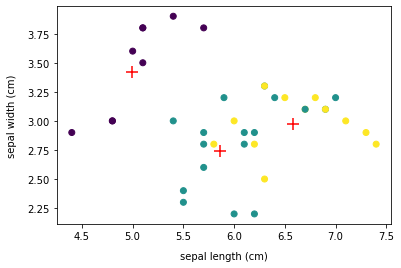

In [56]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test.to_numpy())
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='+')
plt.xlabel('sepal length (cm)', labelpad = 10)
plt.ylabel('sepal width (cm)', labelpad = 10)
plt.show()

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(iris_df)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

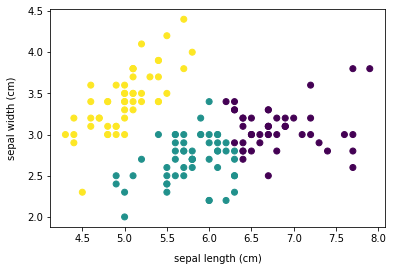

In [71]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=clusters)
plt.xlabel('sepal length (cm)', labelpad = 10)
plt.ylabel('sepal width (cm)', labelpad = 10)
plt.show()

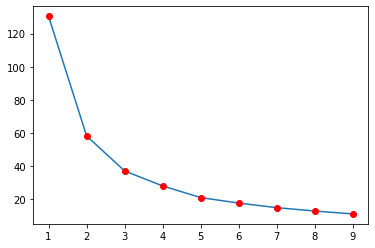

In [69]:

k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_df)
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')